最短路径 ['V1', 'V2', 'V3', 'V5']
最短距离 67


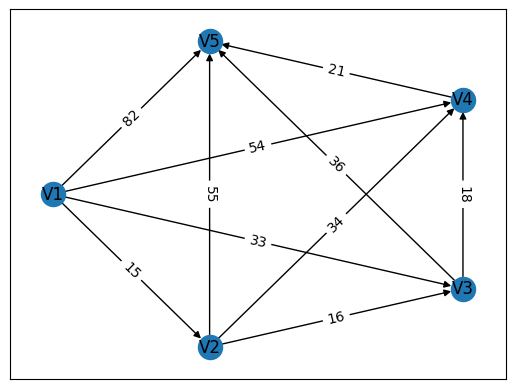

In [37]:
import networkx as nx
import pylab as plt
import numpy as np

purchase = [25, 26, 28, 31]
maintain = [10, 14, 18, 26]
surplus = [20, 16, 13, 11]


def wij(i, j):
    return purchase[i] + sum(maintain[0:j-i]) - surplus[j-i-1]


data = np.zeros((5, 5), dtype=int)
for i in range(4):
    for j in range(i+1, 5):
        data[i, j] = wij(i, j)
D = nx.DiGraph()
D.add_nodes_from(['V1', 'V2', 'V3', 'V4', 'V5'])
for i in range(5):
    for j in range(5):
        if data[i, j] != 0:
            D.add_edge('V'+str(i+1), 'V'+str(j+1), weight=int(data[i, j]))

print('最短路径', nx.shortest_path(D, source='V1', target='V5', weight='weight'))
print('最短距离', nx.shortest_path_length(
    D, source='V1', target='V5', weight='weight'))

pos = nx.shell_layout(D)
edge_labels = nx.get_edge_attributes(D, 'weight')
nx.draw_networkx(D, pos)
nx.draw_networkx_edge_labels(D, pos, edge_labels=edge_labels)
plt.show()
